### Import Libraries and dataset

Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Read the data

In [3]:
mpi_weak = pd.read_csv('mpi_weak_thin.csv')
mpi_strong = pd.read_csv('mpi_strong_thin.csv')
omp_weak = pd.read_csv('omp_weak_thin.csv')
omp_strong = pd.read_csv('omp_strong_thin.csv')

# MPI

### Weak

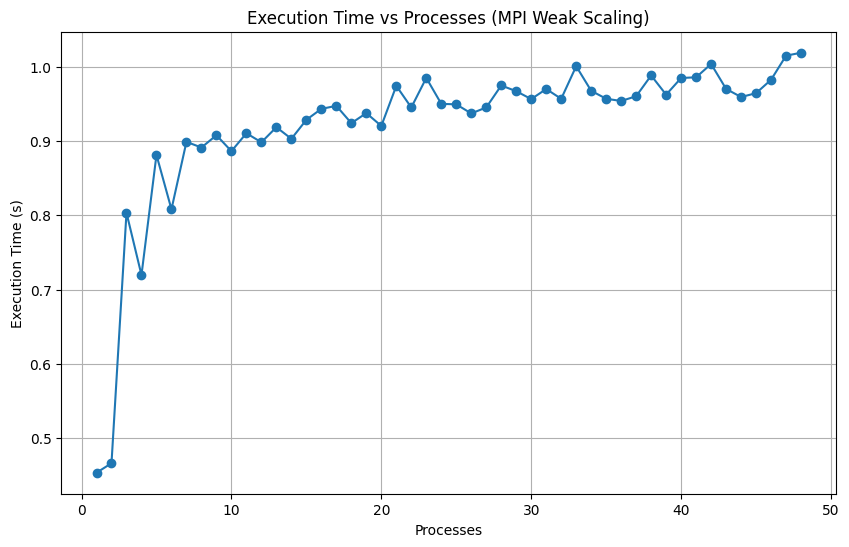

In [4]:
x = mpi_weak["MPI_Processes"]
y = mpi_weak["Execution_Time"]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Processes')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Processes (MPI Weak Scaling)')
plt.grid(True)
plt.show()

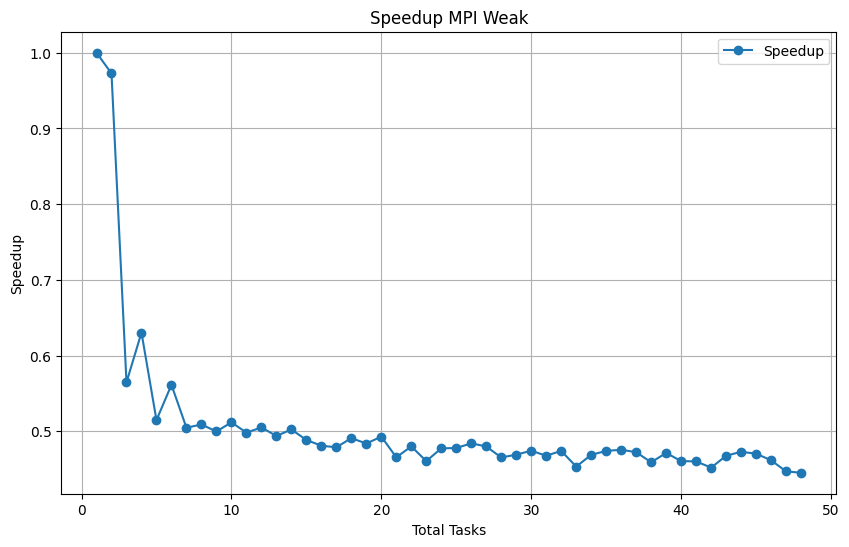

In [5]:
x = mpi_weak["MPI_Processes"].values.reshape(-1, 1)
y = mpi_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
y_normalized = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Speedup')
plt.xlabel('Total Tasks')
plt.ylabel('Speedup')
plt.title('Speedup MPI Weak')
plt.legend()
plt.grid(True)
plt.show()

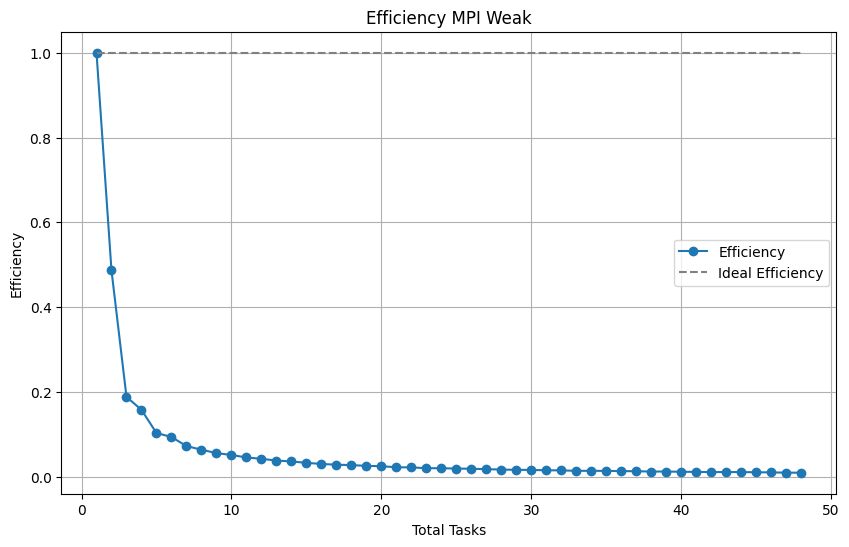

In [6]:
x = mpi_weak["MPI_Processes"].values.reshape(-1, 1) 
y = mpi_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')
plt.xlabel('Total Tasks')
plt.ylabel('Efficiency')
plt.title('Efficiency MPI Weak')
plt.legend()
plt.grid(True)
plt.show()

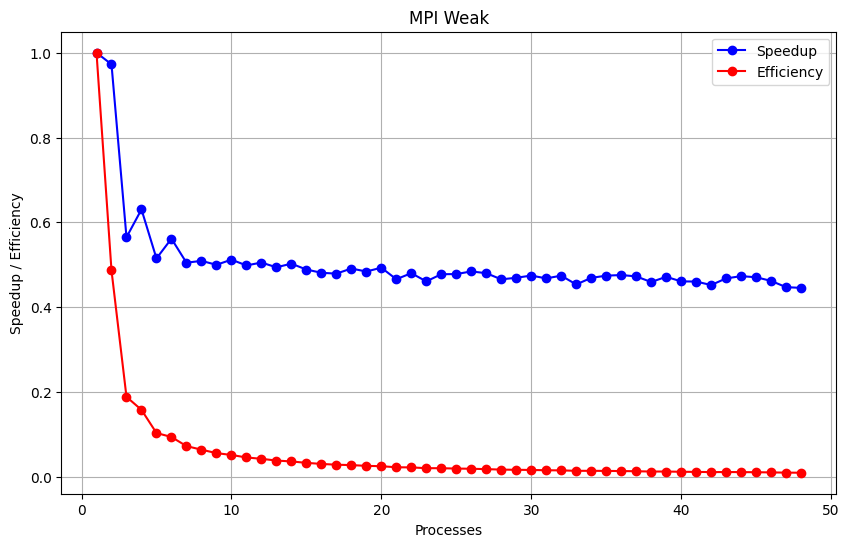

In [7]:
x = mpi_weak["MPI_Processes"].values.reshape(-1, 1)   
y = mpi_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-', color='blue', label='Speedup')
plt.plot(x, efficiency, marker='o', linestyle='-', color='red', label='Efficiency')
plt.xlabel('Processes')
plt.ylabel('Speedup / Efficiency')
plt.title('MPI Weak')
plt.legend()
plt.grid(True)
plt.show()

### Strong

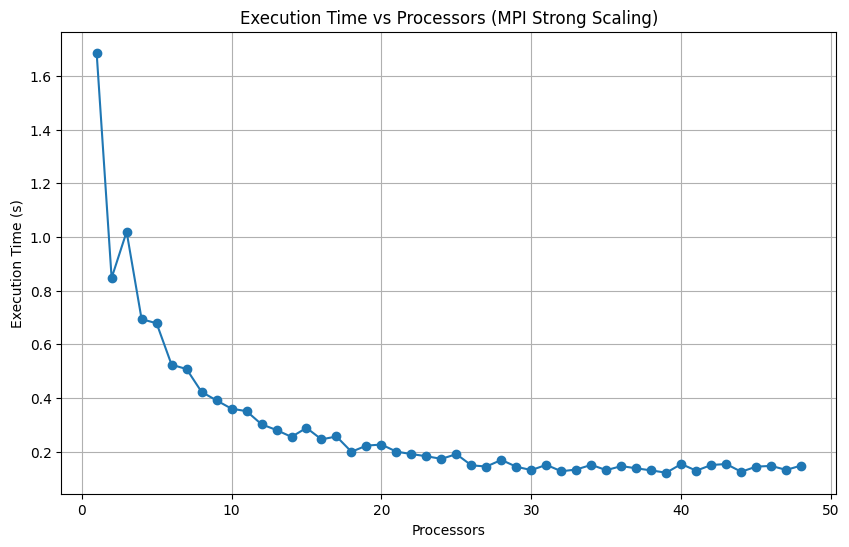

In [8]:
x = mpi_strong["Total Tasks"]
y = mpi_strong["Execution Time (s)"]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Processors')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Processors (MPI Strong Scaling)')
plt.grid(True)
plt.show()

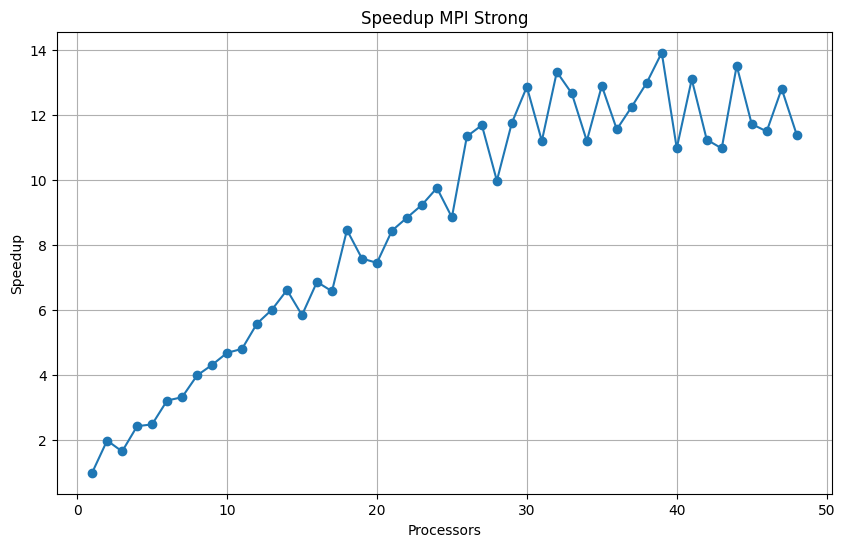

In [9]:
x = mpi_strong["Total Tasks"]
y = mpi_strong["Execution Time (s)"]

reference_execution_time = y.iloc[0]
speedup = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-')
plt.xlabel('Processors')
plt.ylabel('Speedup')
plt.title('Speedup MPI Strong')
plt.grid(True)
plt.show()

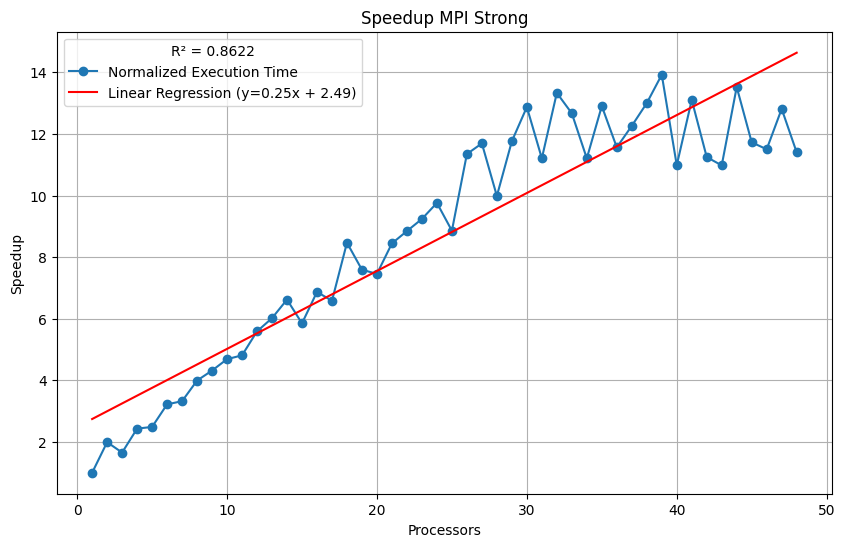

Coefficiente angolare: 0.25306096343590173
Intercetta: 2.490343280106048


In [10]:
x = mpi_strong["Total Tasks"].values.reshape(-1, 1)
y = mpi_strong["Execution Time (s)"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
y_normalized = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
plt.xlabel('Processors')
plt.ylabel('Speedup')
plt.title('Speedup MPI Strong')
plt.legend()

regression_model = LinearRegression()
regression_model.fit(x, y_normalized)
y_pred = regression_model.predict(x)

plt.plot(x, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

r_squared = r2_score(y_normalized, y_pred)
plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')
plt.grid(True)
plt.show()

coefficiente_angolare = regression_model.coef_[0][0]
intercetta = regression_model.intercept_[0]
print("Coefficiente angolare:", coefficiente_angolare)
print("Intercetta:", intercetta)

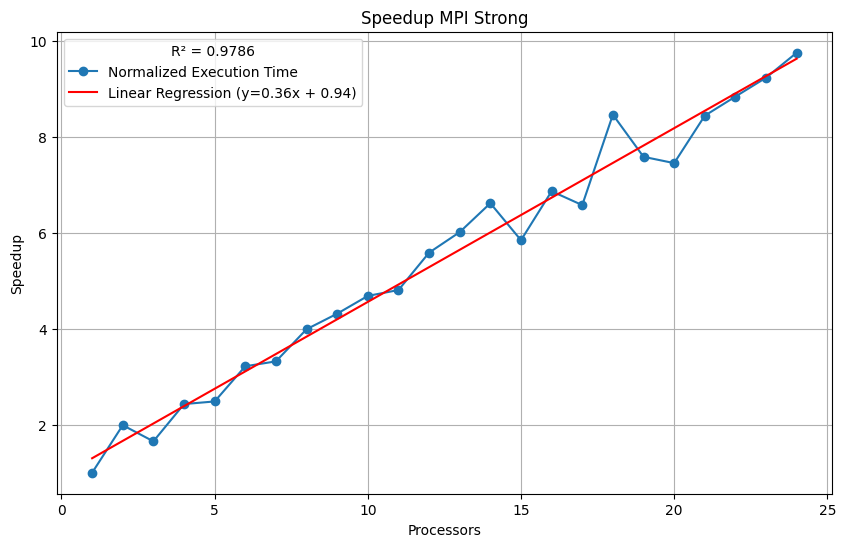

Coefficiente angolare: 0.3623573712375474
Intercetta: 0.9397232297413787


In [11]:
data = mpi_strong.head(24)
x = data["Total Tasks"].values.reshape(-1, 1)
y = data["Execution Time (s)"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
y_normalized = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
plt.xlabel('Processors')
plt.ylabel('Speedup')
plt.title('Speedup MPI Strong')
plt.legend()

regression_model = LinearRegression()
regression_model.fit(x, y_normalized)
y_pred = regression_model.predict(x)

plt.plot(x, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

r_squared = r2_score(y_normalized, y_pred)
plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')
plt.grid(True)
plt.show()

coefficiente_angolare = regression_model.coef_[0][0]
intercetta = regression_model.intercept_[0]
print("Coefficiente angolare:", coefficiente_angolare)
print("Intercetta:", intercetta)

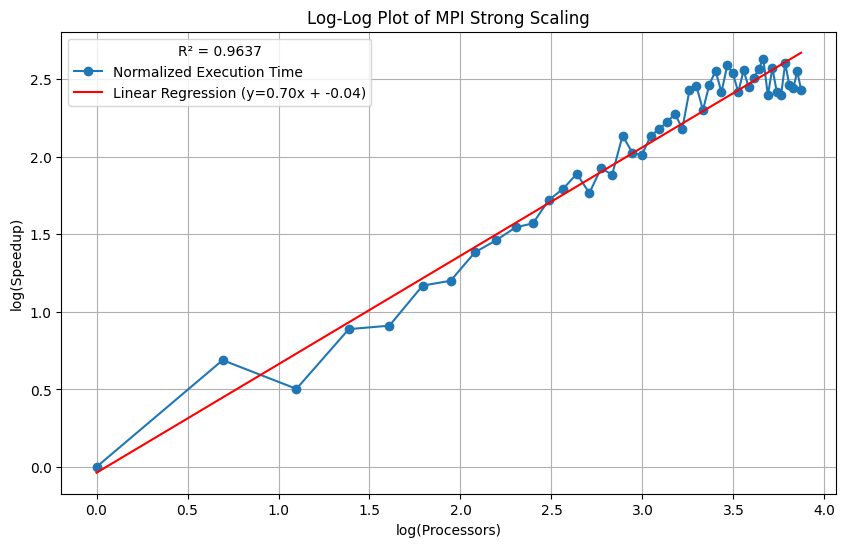

Coefficiente angolare: 0.6997284527773808
Intercetta: -0.037358597590883225


In [12]:
x = mpi_strong["Total Tasks"].values.reshape(-1, 1)  
y = mpi_strong["Execution Time (s)"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
y_normalized = reference_execution_time / y
x_log = np.log(x)
y_log = np.log(y_normalized)

plt.figure(figsize=(10, 6))
plt.plot(x_log, y_log, marker='o', label='Normalized Execution Time')
plt.xlabel('log(Processors)')
plt.ylabel('log(Speedup)')
plt.title('Log-Log Plot of MPI Strong Scaling')
plt.legend()

regression_model = LinearRegression()
regression_model.fit(x_log, y_log)
y_pred = regression_model.predict(x_log)

plt.plot(x_log, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

r_squared = r2_score(y_log, y_pred)

plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')
plt.grid(True)
plt.show()

coefficiente_angoalre = regression_model.coef_[0][0]
intercetta = regression_model.intercept_[0]
print("Coefficiente angolare:", coefficiente_angoalre)
print("Intercetta:", intercetta)

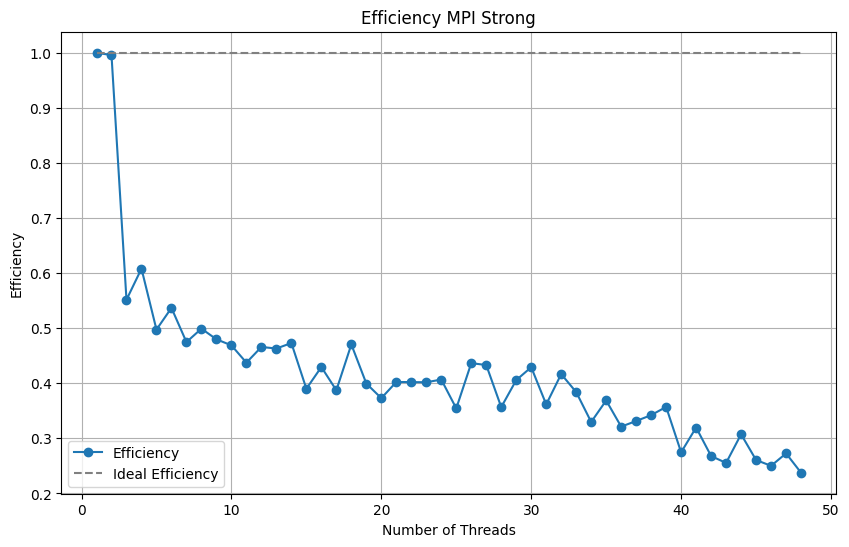

In [13]:
x = mpi_strong["Total Tasks"].values.reshape(-1, 1) 
y = mpi_strong["Execution Time (s)"].values.reshape(-1, 1)
reference_execution_time = y[0][0]

speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency MPI Strong')
plt.legend()
plt.grid(True)
plt.show()

# OMP

### Weak

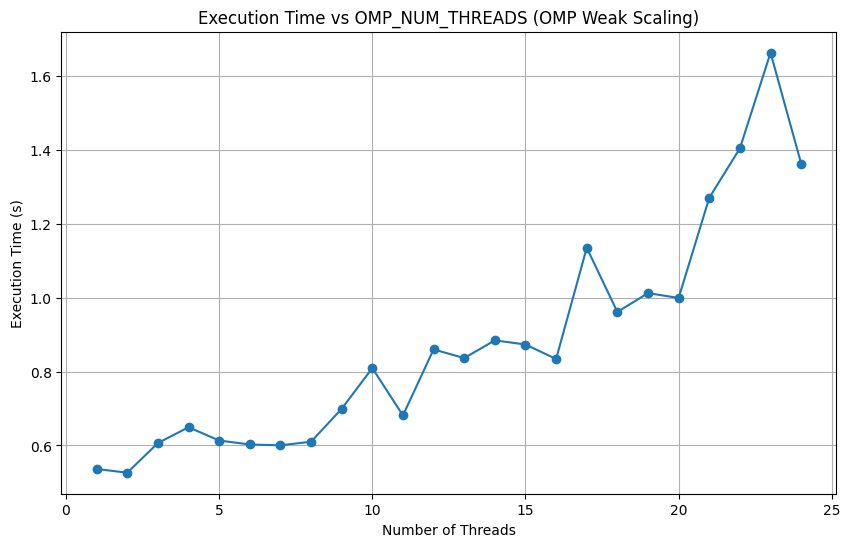

In [14]:
threads = omp_weak["OMP_NUM_THREADS"]
execution_times = omp_weak["Execution_Time"]

plt.figure(figsize=(10, 6))
plt.plot(threads, execution_times, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs OMP_NUM_THREADS (OMP Weak Scaling)')
plt.grid(True)
plt.show()

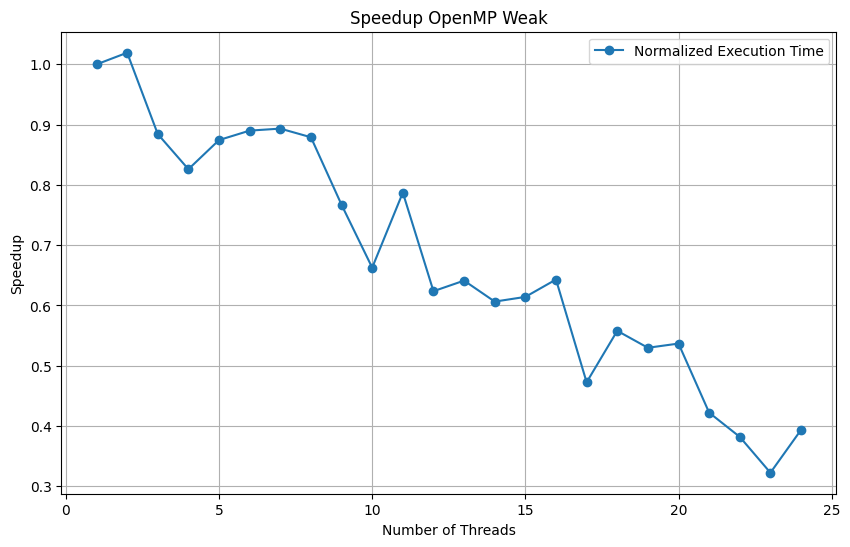

In [15]:
x = omp_weak["OMP_NUM_THREADS"].values.reshape(-1, 1) 
y = omp_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
y_normalized = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, y_normalized, marker='o', linestyle='-', label='Normalized Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup OpenMP Weak')
plt.legend()
plt.grid(True)
plt.show()

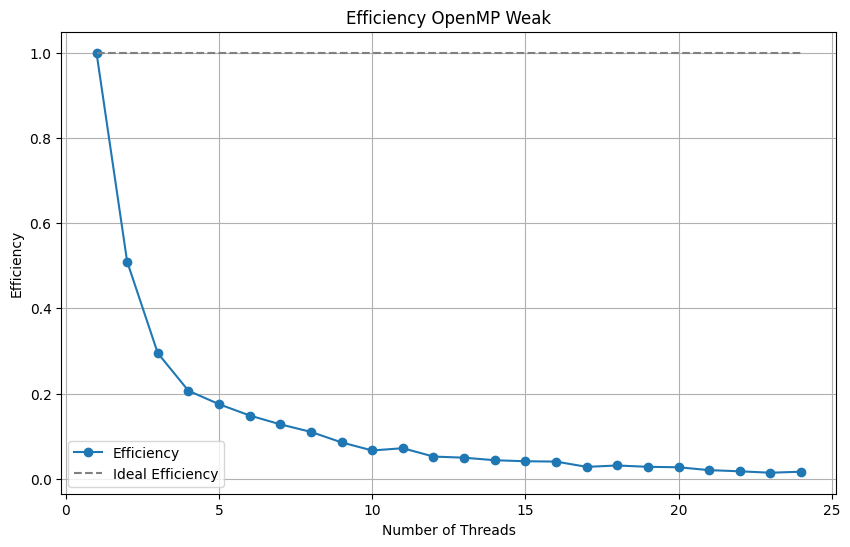

In [16]:
x = omp_weak["OMP_NUM_THREADS"].values.reshape(-1, 1)  
y = omp_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency OpenMP Weak')
plt.legend()
plt.grid(True)
plt.show()

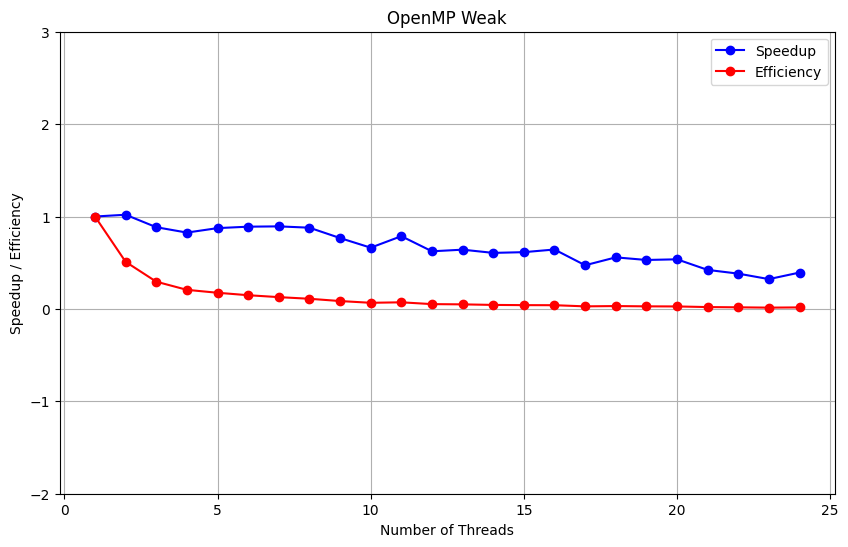

In [27]:
x = omp_weak["OMP_NUM_THREADS"].values.reshape(-1, 1)
y = omp_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-', color='blue', label='Speedup')
plt.plot(x, efficiency, marker='o', linestyle='-', color='red', label='Efficiency')
plt.ylim(-2, 3)
plt.xlabel('Number of Threads')
plt.ylabel('Speedup / Efficiency')
plt.title('OpenMP Weak')
plt.legend()
plt.grid(True)
plt.show()

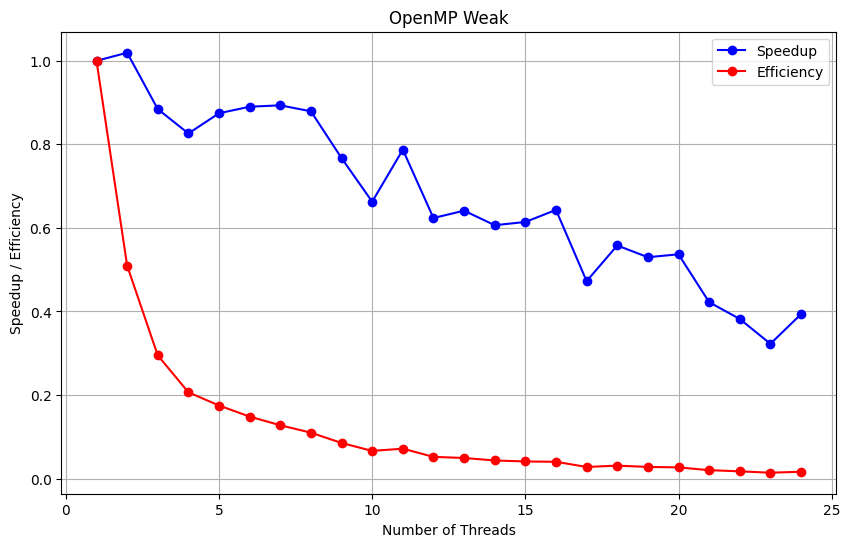

In [18]:
x = omp_weak["OMP_NUM_THREADS"].values.reshape(-1, 1)
y = omp_weak["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-', color='blue', label='Speedup')
plt.plot(x, efficiency, marker='o', linestyle='-', color='red', label='Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup / Efficiency')
plt.title('OpenMP Weak')
plt.legend()
plt.grid(True)
plt.show()

### Strong

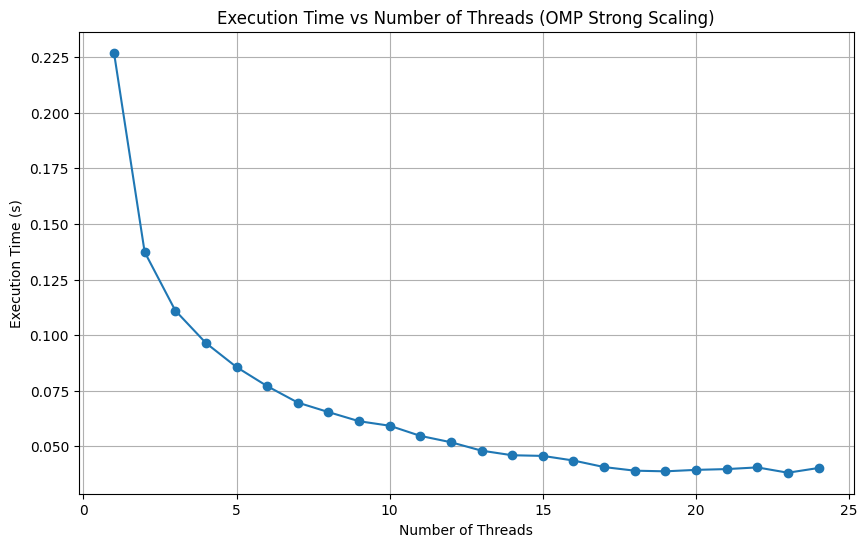

In [19]:
x = omp_strong["OMP_NUM_THREADS"]
y = omp_strong["Execution_Time"]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Number of Threads (OMP Strong Scaling)')

plt.grid(True)
plt.show()

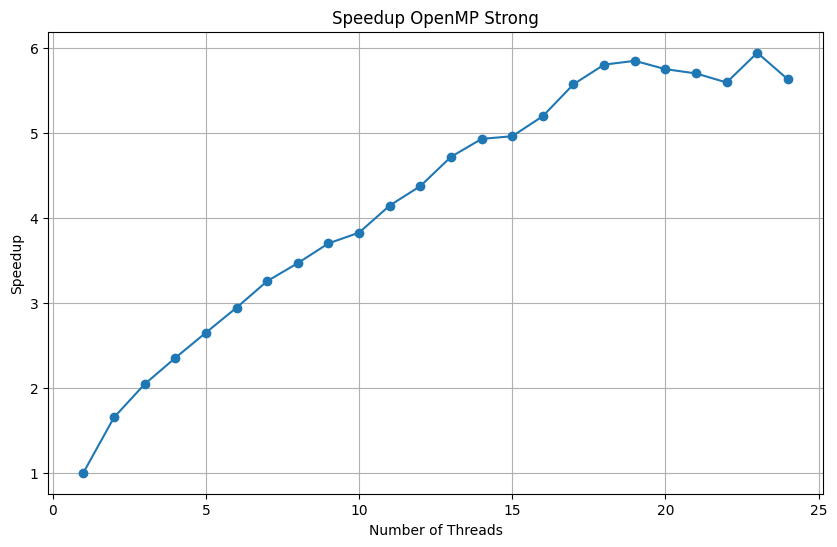

In [20]:
x = omp_strong["OMP_NUM_THREADS"]
y = omp_strong["Execution_Time"]

reference_execution_time = y.iloc[0]
speedup = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup OpenMP Strong')
plt.grid(True)
plt.show()

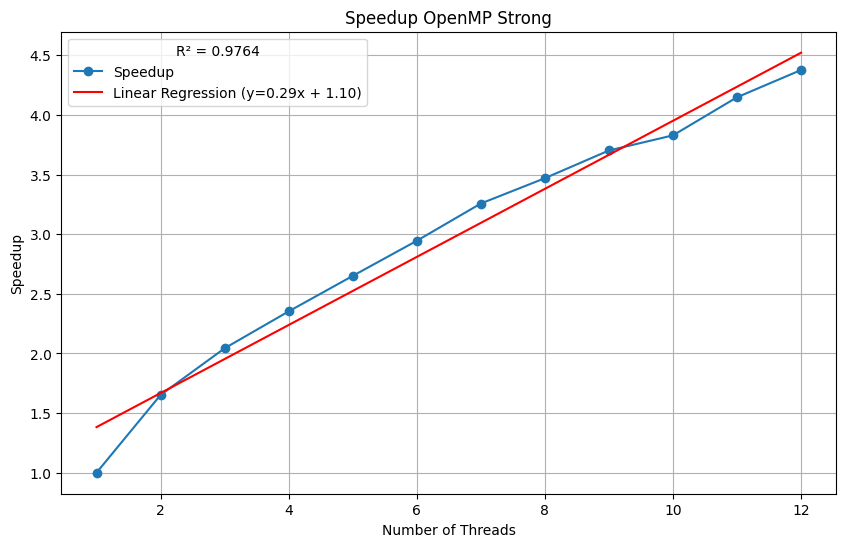

In [21]:
data=omp_strong.head(12)
x = data["OMP_NUM_THREADS"].values.reshape(-1, 1)  
y = data["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-', label='Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup OpenMP Strong')

regression_model = LinearRegression()
regression_model.fit(x, speedup)
y_pred = regression_model.predict(x)

plt.plot(x, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

r_squared = r2_score(speedup, y_pred)

plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')
plt.grid(True)
plt.show()

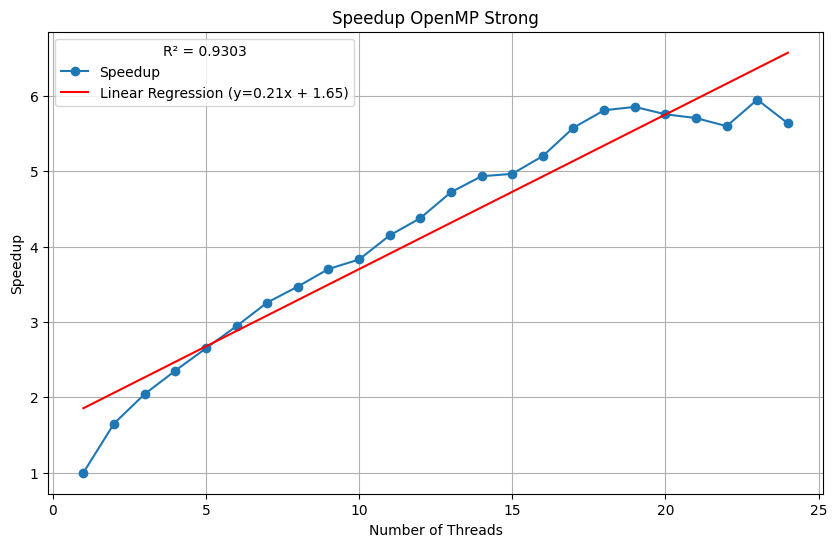

In [22]:
x = omp_strong["OMP_NUM_THREADS"].values.reshape(-1, 1)  
y = omp_strong["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]
speedup = reference_execution_time / y

plt.figure(figsize=(10, 6))
plt.plot(x, speedup, marker='o', linestyle='-', label='Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup OpenMP Strong')

regression_model = LinearRegression()
regression_model.fit(x, speedup)
y_pred = regression_model.predict(x)

plt.plot(x, y_pred, color='red', linestyle='-', label=f'Linear Regression (y={regression_model.coef_[0][0]:.2f}x + {regression_model.intercept_[0]:.2f})')

r_squared = r2_score(speedup, y_pred)

plt.legend(loc='upper left', title=f'R² = {r_squared:.4f}')
plt.grid(True)
plt.show()

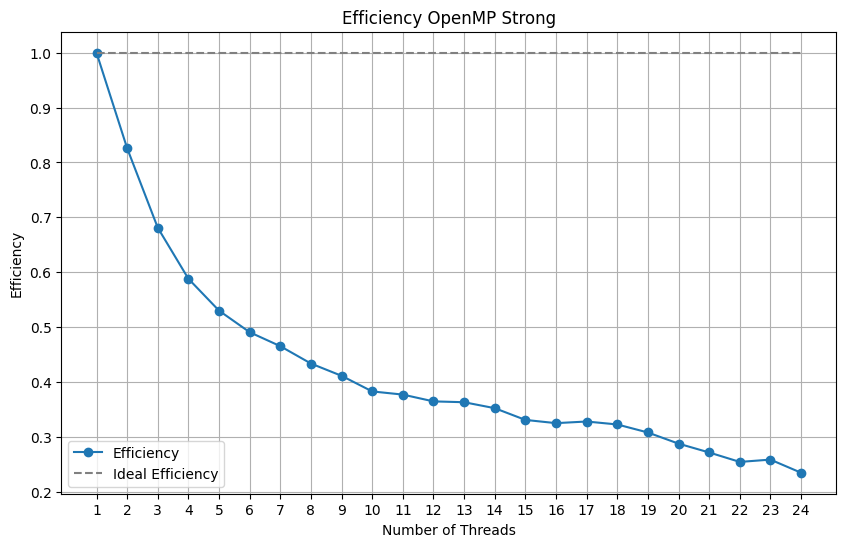

In [23]:
x = omp_strong["OMP_NUM_THREADS"].values.reshape(-1, 1)  
y = omp_strong["Execution_Time"].values.reshape(-1, 1)

reference_execution_time = y[0][0]

speedup = reference_execution_time / y
efficiency = speedup / x

plt.figure(figsize=(10, 6))
plt.plot(x, efficiency, marker='o', linestyle='-', label='Efficiency')
plt.plot(x, x/x, linestyle='--', color='gray', label='Ideal Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency OpenMP Strong')
plt.legend()
plt.xticks(x.flatten())
plt.grid(True)
plt.show()
